In [1]:
# Import basic libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import joblib

print(tf.__version__)

2.10.0


In [2]:
# Define some helper functions

model_path = "../../app/routes/regresion_mpg/model.keras"

def plot_predictions(labels, predictions):
    plt.scatter(labels, predictions)
    plt.xlabel('True Values [MPG]')
    plt.ylabel('Predictions [MPG]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])

def norm(x, stats):
  return (x - stats['mean']) / stats['std']

def build_model(train_dataset):
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [3]:
# Download Dataset

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

In [4]:
# Delete all null/undefined values

dataset = dataset.dropna()

In [5]:
# Transform category origin data into numerical data

origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

In [6]:
# Get Train and Test Datasets

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
# Describe 

train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()

In [8]:
# Get Labels

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [9]:
# Normalize Train and Test Data
normed_train_data = norm(train_dataset, train_stats)
normed_test_data = norm(test_dataset, train_stats)

In [10]:
# Import Model

model = keras.models.load_model(model_path)

3/3 [==============================] - 0s 625us/step


2023-07-29 16:04:56.602170: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


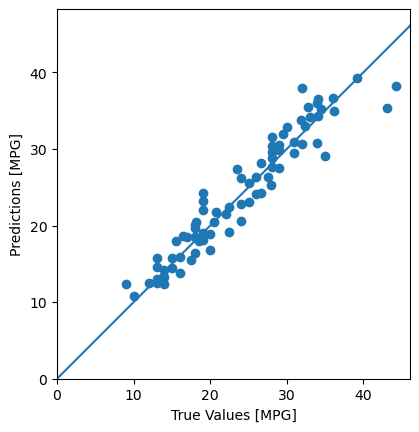

In [11]:
# Test Imported Model

test_predictions = model.predict(normed_test_data).flatten()
plot_predictions(test_labels, test_predictions)

In [12]:
# Eval our model results

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.7661 - mae: 1.8215 - mse: 5.7661 - 80ms/epoch - 27ms/step
Testing set Mean Abs Error:  1.82 MPG
